This week's assignment is to:
Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.


Group members: Habib Khan, Vijaya Cherukuri, Priya Shaji, Abdellah Ait Elmouden

Data Source:
The dataset is taken from https://snap.stanford.edu/data/ego-Twitter.html . 

It is called "Social Circles: Twitter".
This dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks.

Load required libraries

In [3]:
import os.path
import gzip
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

We will write methed to load the data by passing the Edgelist file. We are using netwrokx's read_edgelist() method to read edgelist from twitter_combined.txt file. This function returns Graph object ('networkx.classes.graph.Graph') which further can be used to with regualar netwrokx graph object.

Define Function

In [4]:

def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    
    return edgeGraph

Set the path for edgelist file of Twitter

In [5]:
tweetPath = 'twitter_combined.txt'
tweetGraph  = dataGraph(tweetPath)
type (tweetGraph)
print("Converted Graph's file type is: ", type(tweetGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


As we see, edgelist file is loaded and file type is <class 'networkx.classes.graph.Graph'>. 

Now let's print the information about our twitter Graph 

In [6]:
print( nx.info(tweetGraph))

Name: 
Type: Graph
Number of nodes: 81033
Number of edges: 1335241
Average degree:  32.9555


So, total nodes present are `81306` and total edges in graph are `1342310`. Average degree measure tells the number of edges that are adjacent to a node.

As we have total no. of nodes as `81306`. It wont' be feasible to plot visualization using these many nodes. Therefore we will create a subnetwork, which is a subset of data that is created by finding the neighbours from a particular node.

For that first analyze the degree of centrality measure

Using subgraph() function from networkx

In [7]:
nodes = tweetGraph.neighbors('90966499')
sub_network = tweetGraph.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 145
Average degree:  15.2632


In [33]:
# Function to Calcuate Degree of the Graph

def calcualte_degree(tweetGraph,n = 0):
    tdegree = []
    tNode = []
    for node in tweetGraph.nodes():
        tempD = tweetGraph.degree(node)
        if tempD >= n : tdegree.append(tempD),tNode.append(node)
            
    return tdegree,tNode

In [34]:
twDegree , twNode = calcualte_degree(tweetGraph,0)

In [35]:
# Maximum Degree of the Node in the Netwrok
max(twDegree)

3378

In [36]:
# # Minimum  Degree of the Node in the Netwrok 
min(twDegree)

1

In [37]:
import pandas as pd
data = {'Node': twNode, 
        'Degree': twDegree}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()

,Node,Degree
0,214328887,284
1,34428380,2476
2,17116707,257
3,28465635,719
4,380580781,306


In [38]:
df_NodeDegree.index[df_NodeDegree['Node'] == 90966499].tolist()

[]

In [39]:
#df_NodeDegree.loc[df_NodeDegree['Node'] == 90966499]

df_NodeDegree[df_NodeDegree.Node == 90966499]

#df_NodeDegree.iloc[df_NodeDegree['Node'] == 90966499]


#print(df_NodeDegree.loc[df['Node] == 90966499])

#df.loc[df['column_name'] == some_value]

#90966499

,Node,Degree


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


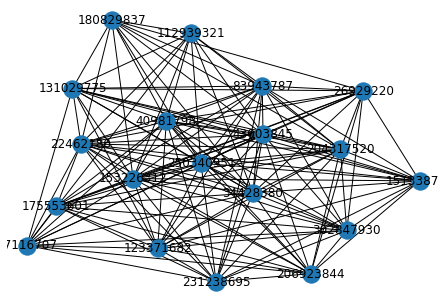

In [7]:
nx.draw(sub_network, with_labels=True)
plt.show()

In [8]:

# Degree centrality (valency) of a node of a graph:
# the fraction of nodes a node v is connected to
nx.degree(sub_network)

DegreeView({'26929220': 14, '43003845': 18, '131029775': 14, '34428380': 18, '180829837': 11, '204317520': 17, '231238695': 14, '123371682': 15, '175553601': 14, '302847930': 15, '151338729': 14, '112939321': 11, '40981798': 18, '250340951': 18, '17116707': 13, '83943787': 16, '206923844': 14, '153226312': 18, '22462180': 18})

In [9]:
# Check if graph is connected

nx.is_connected(tweetGraph)

True

In [10]:
# Create list of connected graphs

def connected_component_subgraphs(network):
    for c in nx.connected_components(network):
        return network.subgraph(c)

In [11]:
connected_components  = connected_component_subgraphs(sub_network)

In [12]:
# Find number of nodes for each connected graph
[len(g) for g in connected_components] # the first and largest is most important

[8, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 8]

In [13]:

# Show all of the connected components
sorted(nx.connected_components(connected_components))

[{'112939321',
  '123371682',
  '131029775',
  '151338729',
  '153226312',
  '17116707',
  '175553601',
  '180829837',
  '204317520',
  '206923844',
  '22462180',
  '231238695',
  '250340951',
  '26929220',
  '302847930',
  '34428380',
  '40981798',
  '43003845',
  '83943787'}]

In [14]:
# Diameter of the graph
nx.diameter(sub_network)

2

In [15]:
print(nx.average_shortest_path_length(sub_network))

1.152046783625731


In [16]:
sub_network.nodes()

NodeView(('26929220', '43003845', '131029775', '34428380', '180829837', '204317520', '231238695', '123371682', '175553601', '302847930', '151338729', '112939321', '40981798', '250340951', '17116707', '83943787', '206923844', '153226312', '22462180'))

In [17]:
sub_network.edges()

EdgeView([('26929220', '22462180'), ('26929220', '250340951'), ('26929220', '206923844'), ('26929220', '43003845'), ('26929220', '204317520'), ('26929220', '153226312'), ('26929220', '83943787'), ('26929220', '151338729'), ('26929220', '34428380'), ('26929220', '40981798'), ('26929220', '131029775'), ('26929220', '175553601'), ('26929220', '302847930'), ('26929220', '180829837'), ('43003845', '123371682'), ('43003845', '112939321'), ('43003845', '34428380'), ('43003845', '40981798'), ('43003845', '22462180'), ('43003845', '151338729'), ('43003845', '83943787'), ('43003845', '153226312'), ('43003845', '204317520'), ('43003845', '231238695'), ('43003845', '17116707'), ('43003845', '250340951'), ('43003845', '206923844'), ('43003845', '131029775'), ('43003845', '302847930'), ('43003845', '175553601'), ('43003845', '180829837'), ('131029775', '40981798'), ('131029775', '112939321'), ('131029775', '83943787'), ('131029775', '123371682'), ('131029775', '204317520'), ('131029775', '153226312'

In [18]:
nx.write_gexf(sub_network, 'twitter.gexf')